# Ford GoBike System Data Exploration

## (February 2019 Data)

## By: _Fady Morris Ebeid_

## Investigation Overview

In this investigation, I wanted to look at the characteristics of Ford GoBike system data for greater San Francisco Bay area. The main focus was on bike trip duration, the time (weekday, hour of the day), user type(customer or subscriber) and user gender.

## Dataset Overview

The data consisted of bike trip data of approximately 183,412 bike trips in San Francisco Bay area for February 2019. The attributes included start and end times, trip duration, user type, member birth year and member gender. 8265 data points were removed from the analysis due to missing gender and birth year data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Make inline plots vector graphics instead of raster graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('dataset/201902-fordgobike-tripdata.csv')

In [4]:
# data wrangling, removing inconsistent or missing data.

#Correcting column data types
df = df.astype({'start_time': 'datetime64', 'end_time': 'datetime64'}, copy=False)

# Removing null values for gender and birth year
null_birth_gender = (df.member_birth_year.isnull() | df.member_gender.isnull())
df = df[~ null_birth_gender]

# Removing birth year outliers (before 1931)
df = df.query('member_birth_year > 1931')

In [5]:
# Creating Extra columns

# Creating weekday ordered categorical type
df['weekday'] = df.start_time.dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wclasses = pd.api.types.CategoricalDtype(ordered = True, categories = weekday_order)

df['weekday'] = df['weekday'].astype(wclasses)

# Start hour
df['start_hour'] = df.start_time.dt.hour

# Age
df['age'] = 2019 - df.member_birth_year

# Trip duration in minutes
df['duration_minutes'] = df.duration_sec / 60

## Ford GoBike System Weekday Usage in February 2019

It was found that bike usage is higher on work days and shows a significant decline on weekends(Saturday and Sunday)

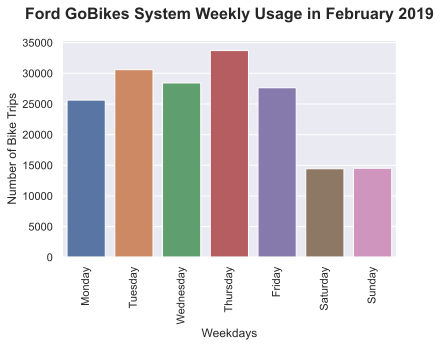

In [6]:
sns.countplot(data = df, x='weekday');
plt.xlabel('Weekday')
plt.xticks(rotation=90);
plt.title('Ford GoBikes System Weekly Usage in February 2019',
                   y=1.07, fontsize=16, fontweight='bold');
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');

## Ford GoBikes System Trip Duration Distribution (In minutes)

The average duration of bike trips is almost around 11.74 minutes. The median is 8.51 minutes and 95% of the data is below 25.55 minutes

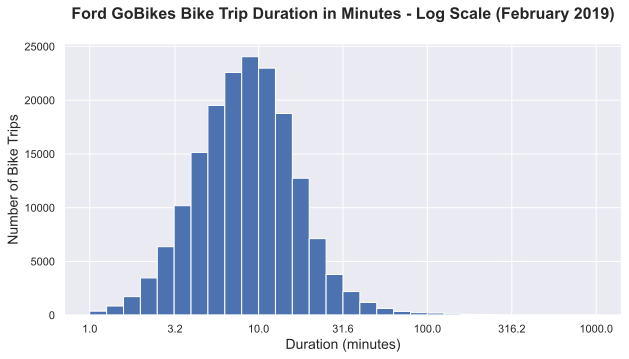

In [7]:
# Axis transformation
# Bin size
bins = 10 ** np.arange(0, 3+0.1, 0.1)
ticks = np.round(10 ** np.arange(0,3 +0.5, 0.5),1)
labels = ['{}'.format(v) for v in ticks]


plt.figure(figsize=(10,5))
plt.hist(x=df.duration_minutes, bins=bins);

plt.xscale('log')


plt.title('Ford GoBikes Bike Trip Duration in Minutes - Log Scale (February 2019)',
                   y=1.07, fontsize=16, fontweight='bold');
plt.ylabel('Number of Bike Trips', fontsize=14);
plt.xlabel('Duration (minutes)', fontsize=14)
plt.xticks(ticks, labels)

plt.show();

##  Ford GoBikes Trip Distribution on Hours of the Day

The Ford GoBike System Usage was found to be bi-modal. It is popular between 8-9 am and 5-6 pm.


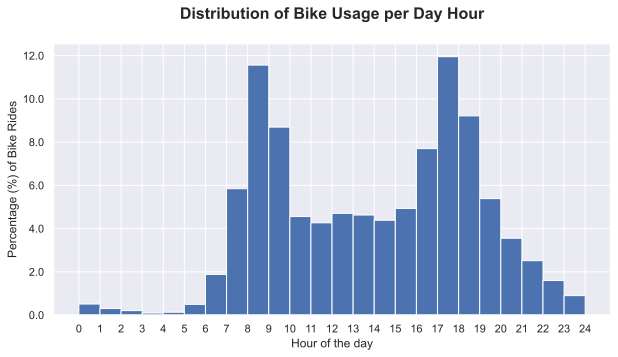

In [8]:
bins_hour = np.arange(0,23+2,1)
max_prob = df.start_hour.value_counts().max() / df.shape[0]
tick_probs = np.arange(0,max_prob + 0.02, 0.02)

plt.figure(figsize=(10,5))
df.start_time.dt.hour.hist(bins=bins_hour);
#figure.label('Bike usage frequency for day hours')
plt.xticks(bins_hour);
plt.yticks(ticks=tick_probs * df.shape[0], labels=(tick_probs * 100).astype(str))
plt.title('Distribution of Bike Usage per Day Hour',
                   y=1.07, fontsize=16, fontweight='bold');
plt.xlabel('Hour of the day');
plt.ylabel('Percentage (%) of Bike Rides');

##  Ford GoBikes User Age Distribution

The system is most popular with age group between 30-40 years old which consists of 39.5% of the users, followed by 20-30 years old group, which is 36.4% of the system users.

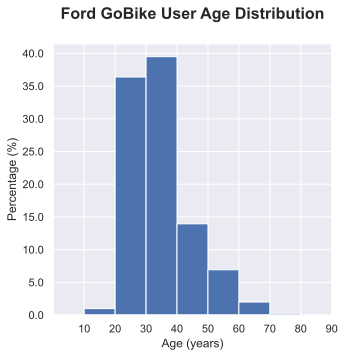

In [9]:
age_bins = np.arange(10, df.age.max() + 10, 10)

plt.figure(figsize=(5,5))
freqs = plt.hist(df.age, bins=age_bins);
plt.xticks(age_bins)
plt.xlim((15,90))

max_prob = freqs[0].max() / df.shape[0]
#tick_probs = np.arange(0,max_prob + 0.01, 0.01)
tick_probs = np.arange(0,max_prob + 0.05, 0.05)
plt.yticks(ticks=tick_probs * df.shape[0], labels=(np.round(tick_probs * 100)).astype(str));

plt.xlim(0,90)
plt.title('Ford GoBike User Age Distribution',
                   y=1.07, fontsize=16, fontweight='bold');

plt.xlabel('Age (years)')
plt.ylabel('Percentage (%)');

## Ford GoBikes User Gender Distribution

The majority of system users (74%) are males, while females are 23.3% of the users.

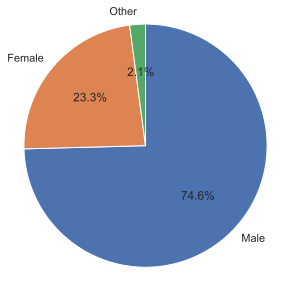

In [10]:
gender_counts = df.member_gender.value_counts()

plt.figure(figsize=(5,5))
plt.pie(gender_counts, startangle = 90, labels = gender_counts.index, counterclock = False, autopct='%1.1f%%');

plt.axis('square');

## Ford GoBikes Distribution of User Membership Types

90% of the users are subscribers, while only 9.5% of the users are customers.

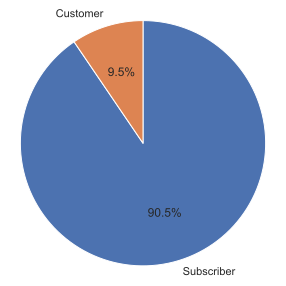

In [11]:
user_type_counts = df.user_type.value_counts()

plt.figure(figsize=(5,5))
plt.pie(user_type_counts, startangle = 90, labels = user_type_counts.index, counterclock = False, autopct='%1.1f%%');

plt.axis('square');

## Ford GoBikes Average Duration (in minutes) per Each User Type

On average, customers' trip duratin is almost double that of subscribers. Customers spend on average 21.8 minutes on the trip, compared to subscribers who spend 10.6 minutes.



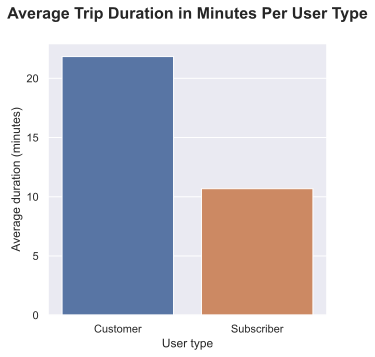

In [12]:
user_duration_avg = df.groupby('user_type').duration_minutes.mean()
user_duration_avg = user_duration_avg.reset_index()

plt.figure(figsize=(5,5))
ax = sns.barplot(data=user_duration_avg, x='user_type', y='duration_minutes')
#ax.set_title('Average trip duration in seconds per user type')
plt.title('Average Trip Duration in Minutes Per User Type',
                   y=1.07, fontsize=16, fontweight='bold');

plt.xlabel('User type')
plt.ylabel('Average duration (minutes)');

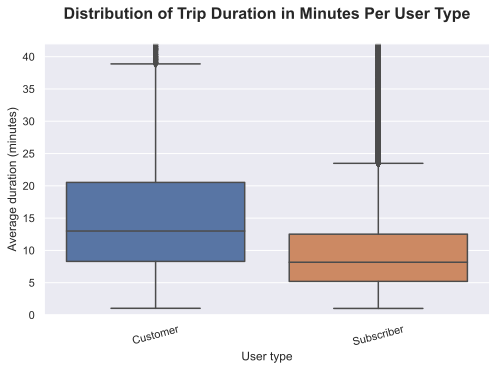

In [13]:
plt.figure(figsize = [8, 5])
base_color = sns.color_palette()[0]

sns.boxplot(data=df, x='user_type', y='duration_minutes')
plt.xticks(rotation=15);
plt.ylim(0,42); # set y-axis limits to be same as left plot
plt.title('Distribution of Trip Duration in Minutes Per User Type',
                   y=1.07, fontsize=16, fontweight='bold');

plt.xlabel('User type')
plt.ylabel('Average duration (minutes)');

## Ford GoBikes  Customer vs. Subscriber Trends in February 2019

Bike trips are popular with subscribers on work weekdays (Monday to Friday) and shows a decline on weekends(Saturdays and Sundays).

Customers' usage of bikes is consistent on all week days.

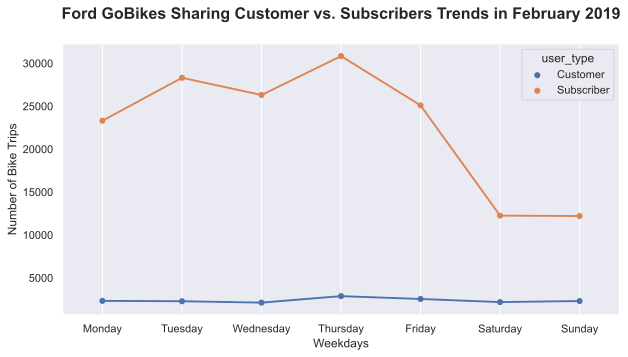

In [14]:
df_sub = df.groupby(['weekday', 'user_type']).size().reset_index()
df_sub.columns = df_sub.columns[:2].append(pd.Index(['frequency']))

plt.figure(figsize=(10, 5))
ax = sns.pointplot(data=df_sub, x='weekday', y='frequency', hue = 'user_type', scale=.7);
plt.title('Ford GoBikes Sharing Customer vs. Subscribers Trends in February 2019', y=1.07, 
          fontsize=16, fontweight='bold')
plt.xlabel('Weekdays')
plt.ylabel('Number of Bike Trips');
plt.grid()
